In [2]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split

/Users/YlanNguyen/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
credit = pd.read_csv('default of credit card clients.csv', header=1)

In [4]:
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

(array([11888.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 18112.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

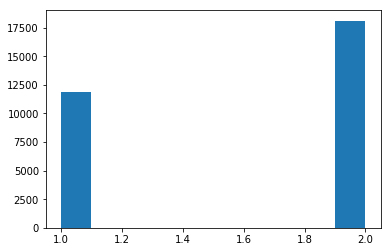

In [5]:
plt.hist(credit['SEX'])

(array([1.4000e+01, 1.0585e+04, 0.0000e+00, 1.4030e+04, 0.0000e+00,
        4.9170e+03, 1.2300e+02, 0.0000e+00, 2.8000e+02, 5.1000e+01]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

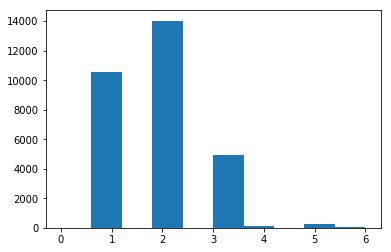

In [6]:
plt.hist(credit['EDUCATION'])

(array([1.2498e+04, 7.8800e+03, 5.0590e+03, 2.7590e+03, 1.5980e+03,
        1.2700e+02, 5.6000e+01, 2.2000e+01, 0.0000e+00, 1.0000e+00]),
 array([  10000.,  109000.,  208000.,  307000.,  406000.,  505000.,
         604000.,  703000.,  802000.,  901000., 1000000.]),
 <a list of 10 Patch objects>)

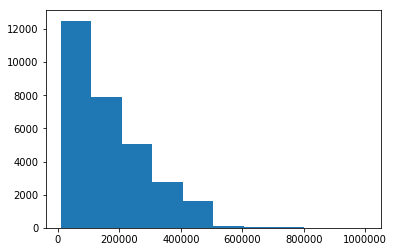

In [7]:
plt.hist(credit['LIMIT_BAL'])

(array([5.127e+03, 8.261e+03, 6.514e+03, 4.812e+03, 2.606e+03, 1.836e+03,
        6.280e+02, 1.710e+02, 4.000e+01, 5.000e+00]),
 array([21. , 26.8, 32.6, 38.4, 44.2, 50. , 55.8, 61.6, 67.4, 73.2, 79. ]),
 <a list of 10 Patch objects>)

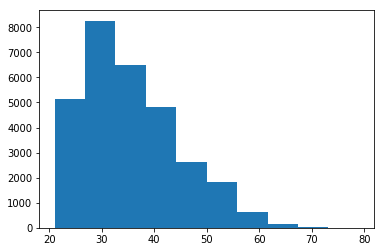

In [8]:
plt.hist(credit['AGE'])

(array([   54.,     0.,     0., 13659.,     0.,     0., 15964.,     0.,
            0.,   323.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

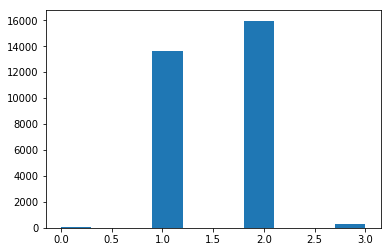

In [9]:
plt.hist(credit['MARRIAGE'])

In [10]:
credit.groupby(['SEX', 'MARRIAGE'])['SEX'].count()

SEX  MARRIAGE
1    0             14
     1           5190
     2           6553
     3            131
2    0             40
     1           8469
     2           9411
     3            192
Name: SEX, dtype: int64

(array([23364.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6636.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

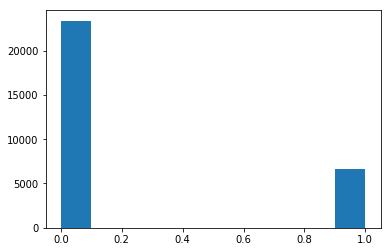

In [11]:
plt.hist(credit['default payment next month'])

In [12]:
credit.groupby(['SEX', 'default payment next month'])['SEX'].count()

SEX  default payment next month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
Name: SEX, dtype: int64

In [13]:
credit.groupby(['MARRIAGE', 'default payment next month'])['MARRIAGE'].count()

MARRIAGE  default payment next month
0         0                                49
          1                                 5
1         0                             10453
          1                              3206
2         0                             12623
          1                              3341
3         0                               239
          1                                84
Name: MARRIAGE, dtype: int64

In [14]:
credit.groupby(['SEX', 'MARRIAGE', 'default payment next month'])['SEX'].count()

SEX  MARRIAGE  default payment next month
1    0         0                               12
               1                                2
     1         0                             3844
               1                             1346
     2         0                             5068
               1                             1485
     3         0                               91
               1                               40
2    0         0                               37
               1                                3
     1         0                             6609
               1                             1860
     2         0                             7555
               1                             1856
     3         0                              148
               1                               44
Name: SEX, dtype: int64

In [15]:
credit.pivot_table('default payment next month', 'MARRIAGE','SEX', aggfunc=np.sum, margins=True)

SEX,1,2,All
MARRIAGE,,,
0,2,3,5
1,1346,1860,3206
2,1485,1856,3341
3,40,44,84
All,2873,3763,6636


In [16]:
credit.pivot_table('default payment next month', 'EDUCATION','SEX', aggfunc=np.sum, margins=True)

SEX,1,2,All
EDUCATION,,,
0,0,0,0
1,906,1130,2036
2,1408,1922,3330
3,545,692,1237
4,4,3,7
5,6,12,18
6,4,4,8
All,2873,3763,6636


In [17]:
credit.AGE.median()

34.0

In [18]:
credit.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

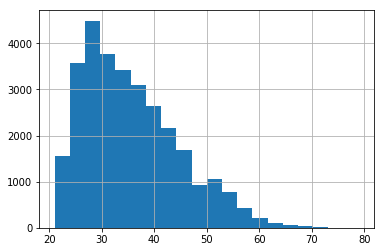

In [19]:
credit.AGE.hist(bins=20)

/Users/YlanNguyen/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1516: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


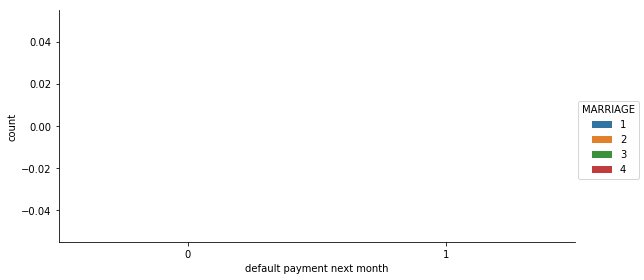

In [20]:
import seaborn as sns
sns.factorplot('default payment next month', data=credit, kind='count', hue='MARRIAGE', order=[0,1], hue_order=['1','2','3','4'], aspect=2)

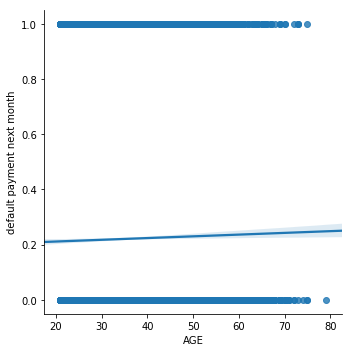

In [21]:
sns.lmplot('AGE','default payment next month', data=credit)

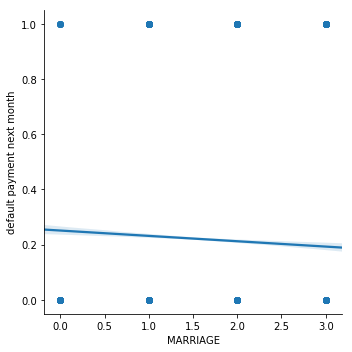

In [22]:
sns.lmplot('MARRIAGE','default payment next month', data=credit)

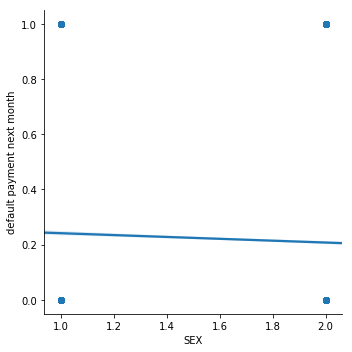

In [23]:
sns.lmplot('SEX','default payment next month', data=credit)

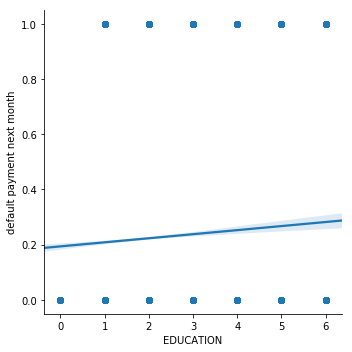

In [24]:
sns.lmplot('EDUCATION','default payment next month', data=credit)

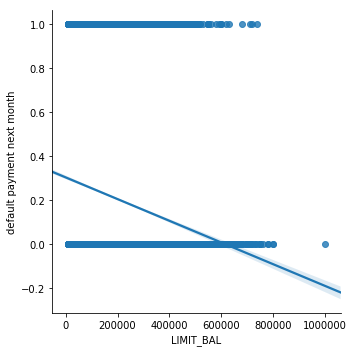

In [25]:
sns.lmplot('LIMIT_BAL','default payment next month', data=credit)

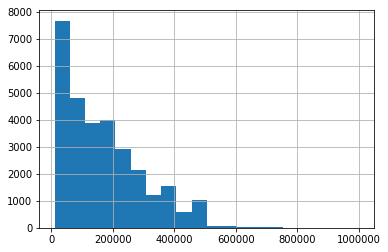

In [26]:
credit.LIMIT_BAL.hist(bins=20)

In [27]:
credit.groupby(['LIMIT_BAL', 'default payment next month'])['LIMIT_BAL'].count()

LIMIT_BAL  default payment next month
10000      0                              296
           1                              197
16000      0                                2
20000      0                             1278
           1                              698
30000      0                             1042
           1                              568
40000      0                              138
           1                               92
50000      0                             2480
           1                              885
60000      0                              592
           1                              233
70000      0                              521
           1                              210
80000      0                             1204
           1                              363
90000      0                              485
           1                              166
100000     0                              776
           1                              

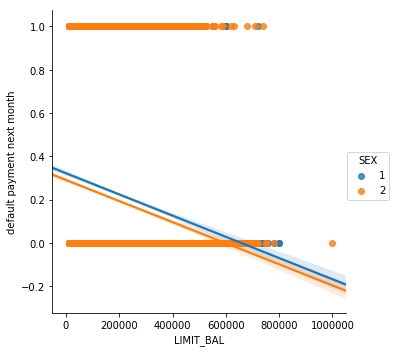

In [28]:
sns.lmplot('LIMIT_BAL','default payment next month', hue='SEX', data=credit ,hue_order=(1,2))

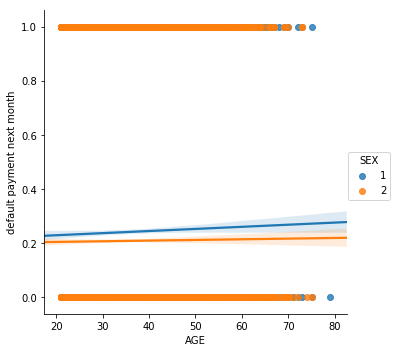

In [29]:
sns.lmplot('AGE','default payment next month', hue='SEX', data=credit ,hue_order=(1,2))

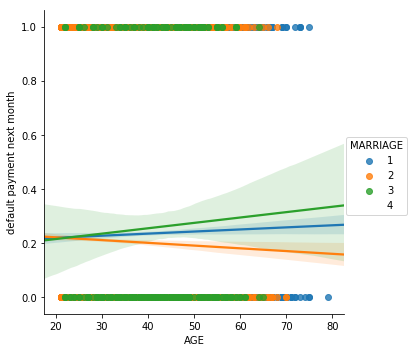

In [30]:
sns.lmplot('AGE','default payment next month', hue='MARRIAGE', data=credit ,hue_order=(1,2,3,4))

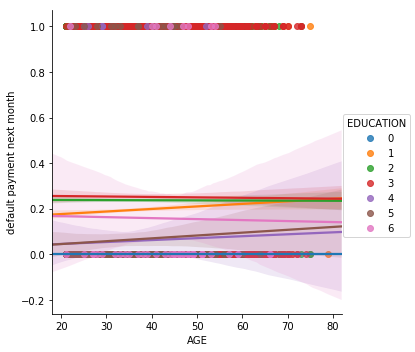

In [31]:
sns.lmplot('AGE','default payment next month', hue='EDUCATION', data=credit ,hue_order=(0,1,2,3,4,5,6))

In [32]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [33]:
credits = pd.read_csv('default of credit card clients-1.csv', header=1)

In [35]:
X, y = make_classification(n_samples=20000, n_features=28, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

In [36]:
svc = SVC(kernel="linear")

In [37]:
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 13


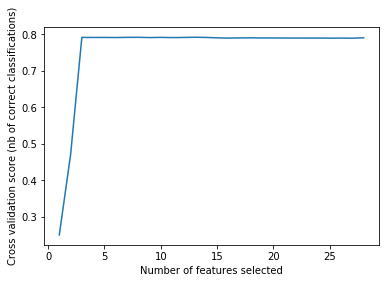

In [38]:
plt.figure()
plt.xlabel(`"Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [40]:
credits.head()
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [71]:
features = credits.iloc[:,1:23]
print ('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,2,2,1,24,2,2,-1,-1,-2,...,3102,689,0,0,0,0,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,90000,2,2,2,34,0,0,0,0,0,...,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,50000,2,2,1,37,0,0,0,0,0,...,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,50000,1,2,1,57,-1,0,-1,0,0,...,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [94]:
depVar = credits['PAY_AMT6']
X_train = (credits[: 1000])
X_train.head()

y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [95]:
X_test = credits[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
29900  29901      20000    1          2         2   29      0      0     -2   
29901  29902      50000    1          2         2   29      1      2      0   
29902  29903     170000    1          3         2   30      0     -1      0   
29903  29904     260000    1          1         1   30     -1      0     -1   
29904  29905      60000    1          3         2   30      0      0      0   

       PAY_4   ...     BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
29900     -2   ...             0          0          0         0         0   
29901      0   ...         50590      50248      49387         0      6556   
29902      0   ...        161351     126198     124746    168096      6409   
29903     -1   ...            99         99     172104     10018     13333   
29904      0   ...         58732      59306      59728      2600      455

In [96]:
y_test = depVar[:-100]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 29900


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [97]:
from sklearn.cross_validation import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [99]:
X_train.shape, X_test.shape

((750, 25), (250, 25))

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 25), (188, 25))

In [101]:
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [102]:
modelRF.fit(X_train,y_train)
modelSVR.fit(X_train,y_train)
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
print(cross_val_score(modelRF, X_train, y_train)) 

[0.95321589 0.97247064 0.63133281]


In [105]:
print(cross_val_score(modelSVR, X_train, y_train)) 

[-0.03732566 -0.03251855 -0.01330394]


In [106]:
print(cross_val_score(modelLR, X_train, y_train)) 

[1. 1. 1.]


In [107]:
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.76548076 0.97236776 0.50625637]


0.9496519029896267

In [108]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train))
modelSVR.score(X_train,y_train)

[-0.03732566 -0.03251855 -0.01330394]


-0.018290759553938107

In [110]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train))
modelLR.score(X_train,y_train)

[1. 1. 1.]


1.0

In [111]:
predictionsrf = modelRF.predict(X_test)
predRsquaredrf = r2_score(y_test,predictionsrf)
rmserf = sqrt(mean_squared_error(y_test, predictionsrf))
print('R Squared: %.3f' % predRsquaredrf)
print('RMSE: %.3f' % rmserf)

R Squared: 0.848
RMSE: 4222.475


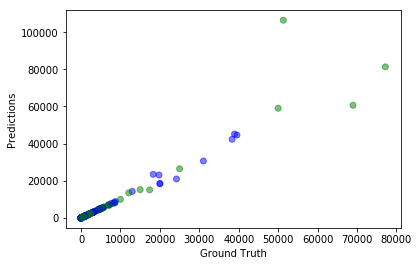

In [112]:
plt.scatter(y_test, predictionsrf, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [113]:
predictionsSVR = modelSVR.predict(X_test)
predRsquaredSVR = r2_score(y_test,predictionsSVR)
rmseSVR = sqrt(mean_squared_error(y_test, predictionsSVR))
print('R Squared: %.3f' % predRsquaredSVR)
print('RMSE: %.3f' % rmseSVR)

R Squared: -0.129
RMSE: 11492.361


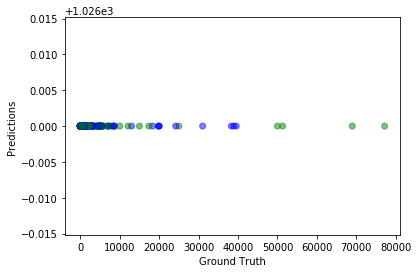

In [114]:
plt.scatter(y_test, predictionsSVR, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [115]:
predictionsLR = modelLR.predict(X_test)
predRsquaredLR = r2_score(y_test,predictionsLR)
rmseLR = sqrt(mean_squared_error(y_test, predictionsLR))
print('R Squared: %.3f' % predRsquaredLR)
print('RMSE: %.3f' % rmseLR)

R Squared: 1.000
RMSE: 0.000
